In [1]:
import tensorflow as tf
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [8]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                vertical_flip=True,
                fill_mode='nearest',
                validation_split=0.3)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(224,224),
        batch_size=5,
        class_mode='categorical',
        subset='training')

validation_generator = validation_datagen.flow_from_directory(
        test_dir, 
        target_size=(224,224), 
        batch_size=4,
        class_mode='categorical',
        subset='validation')

Found 1061 images belonging to 4 classes.
Found 357 images belonging to 4 classes.


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=4096,activation="relu"),
    tf.keras.layers.Dense(units=4096,activation="relu"),
    tf.keras.layers.Dense(units=2, activation="softmax"),
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_53 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_54 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_55 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [12]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)
                                            
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction])

Epoch 1/10


2022-06-20 22:07:41.913235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/68/ws912nt53sj93j_v0j_wm41r0000gn/T/ipykernel_7122/4123268135.py", line 11, in <cell line: 11>
      history = model.fit(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/opt/homebrew/Cellar/python@3.9/3.9.12_1/Frameworks/Python.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 504, in dispatch_queue
      await self.process_one()
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 493, in process_one
      await dispatch(*args)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 400, in dispatch_shell
      await result
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 724, in execute_request
      reply_content = await reply_content
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/68/ws912nt53sj93j_v0j_wm41r0000gn/T/ipykernel_7122/4123268135.py", line 11, in <cell line: 11>
      history = model.fit(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/harysetiawan/Documents/College Project/PCD/FinalProject/venv/lib/python3.9/site-packages/keras/backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[5,2] labels_size=[5,4]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
	 [[sequential_4/dense_14/Softmax/_20]]
  (1) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[5,2] labels_size=[5,4]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_9965]

In [11]:
def eval_plot(history):
    
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    acc_plot, = plt.plot(epochs, acc, 'r')
    val_acc_plot, = plt.plot(epochs, val_acc, 'b')
    plt.title('Training and Validation Accuracy')
    plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

    # Loss plot
    plt.subplot(1, 2, 2)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    loss_plot, = plt.plot(epochs, loss, 'r')
    val_loss_plot, = plt.plot(epochs, val_loss, 'b')
    plt.title('Training and Validation Loss')
    plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

def evaluate(model):
    
    validation_generator = train_datagen.flow_from_directory(
            test_dir, 
            target_size=(256,256), 
            batch_size=10, 
            class_mode='categorical',
            shuffle = False,
            subset='validation')

    batch_size = 10
    num_of_test_samples = len(validation_generator.filenames)

    Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
    y_pred = np.argmax(Y_pred, axis=1)

    print('\nConfusion Matrix\n')
    print(confusion_matrix(validation_generator.classes, y_pred))


    print('\n\nClassification Report\n')
    target_names = ['GINA', 'MATAHARI', 'SIRAT','ULI']
    print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

def predict_image(image_upload, model = model):
    im = image_upload
    im_array = np.asarray(im)
    im_array = im_array*(1/225)
    im_input = tf.reshape(im_array, shape = [1, 256, 256, 3])

    predict_proba = sorted(model.predict(im_input)[0])[2]
    predict_class = np.argmax(model.predict(im_input))

    print('\n')
    plt.show()
    print("\nImage prediction result: ", predict_label)
    print("Probability: ", round(predict_proba*100,2), "%")
    print('\n')

Found 268 images belonging to 4 classes.


/var/folders/68/ws912nt53sj93j_v0j_wm41r0000gn/T/ipykernel_1851/711828489.py:38: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
2022-06-20 19:34:48.729819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Confusion Matrix

[[43  0  0  0]
 [44 26  5  0]
 [ 0  0 75  0]
 [ 0  0  0 75]]


Classification Report

              precision    recall  f1-score   support

        GINA       0.49      1.00      0.66        43
    MATAHARI       1.00      0.35      0.51        75
       SIRAT       0.94      1.00      0.97        75
         ULI       1.00      1.00      1.00        75

    accuracy                           0.82       268
   macro avg       0.86      0.84      0.79       268
weighted avg       0.90      0.82      0.80       268



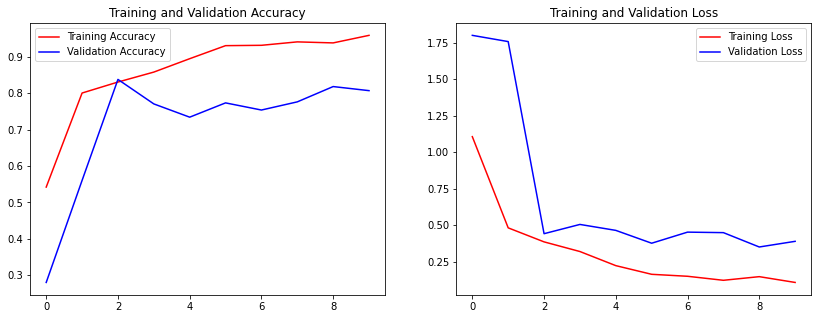

In [12]:
eval_plot(history)
evaluate(model)
